<a href="https://colab.research.google.com/github/Elie87/PythonPojects/blob/main/Practice_2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras is built on top of tensor flow and allows 2 ways to build ANN

1.   Functional API: that allows high flexibilty 
2.  Faster and more easy and mostly used




In [ ]:
!pip install --upgrade Keras


Requirement already up-to-date: Keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


1-The functional API

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 84        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


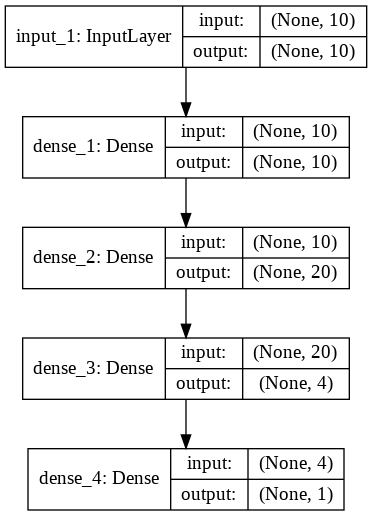

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.utils  import plot_model

#define the input
visible=Input(shape=(10,))   # 10 neurons on the input

#conect hidden layers
hidden1=Dense(10,activation='relu')(visible) # the 1st hiden layer has 10 neurone conecto to visible
hidden2=Dense(20,activation='relu')(hidden1)
hidden3=Dense(4,activation='relu')(hidden2)
output=Dense(1,activation='sigmoid')(hidden3)

#create the model
model = Model(inputs=visible,outputs=output)

#summarize layers
model.summary()

plot_model(model,show_shapes=True,show_layer_names=True)


2- the mostly used way(easier and Faster)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


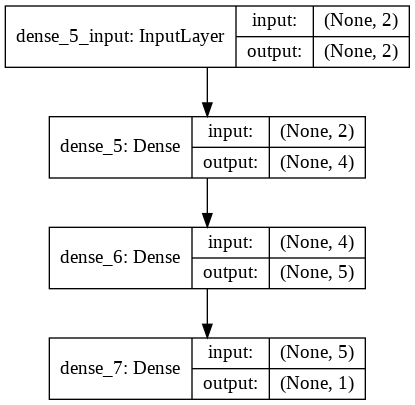

In [ ]:
from keras.models import Sequential
from keras.utils  import plot_model
model_2=Sequential()
model_2.add(Dense(4,input_dim=2,activation='relu'))#create 1st hiden layer with 5 neurones conected to the input layer that has 2 neurone
model_2.add(Dense(5,activation='relu'))# create the second hiiden 
model_2.add(Dense(1,activation='sigmoid'))# the output layer with 1 neurone

model_2.summary()
plot_model(model_2,show_shapes=True,show_layer_names=True)

Train  Model (Manual split)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np

seed=8
np.random.seed(seed)

data=np.loadtxt("pima-indians-diabetes.xls",delimiter=',')

X=data[:,0:8]
Y=data[:,8]
print(X[0])
print(X[0,:].shape)
print(Y[0:10])

model=Sequential()
model.add(Dense(10,input_dim=8,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_train, X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=seed)
'''
the best is to have 2 splits X_val,y_val for validation during trainig 
And X_test,y_test for the final testing as new data
'''
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,batch_size=10)

print("--------")
scores = model.evaluate(X_test,y_test)
print(model.metrics_names)
print(scores)   #[scores[0]=loss,scores[1]=accuracy]

''' or we can have automatic split'''
#model.fit(X,Y,validation_split=0.33,epochs=150,batch_size=10)




[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
(8,)
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 899us/step - loss: 7.9260 - accuracy: 0.6440 - val_loss: 2.3436 - val_accuracy: 0.5236
Epoch 2/150
514/514 [==============================] - 0s 213us/step - loss: 1.7186 - accuracy: 0.5311 - val_loss: 1.5698 - val_accuracy: 0.5630
Epoch 3/150
514/514 [==============================] - 0s 172us/step - loss: 1.2356 - accuracy: 0.6167 - val_loss: 1.3816 - val_accuracy: 0.5906
Epoch 4/150
514/514 [==============================] - 0s 167us/step - loss: 1.0786 - accuracy: 0.6206 - val_loss: 1.2387 - val_accuracy: 0.5945
Epoch 5/150
514/514 [==============================] - 0s 175us/step - loss: 0.9427 - accuracy: 0.6031 - val_loss: 1.1794 - val_accuracy: 0.6024
Epoch 6/150
514/514 [==============================] - 0s 231us/step - loss: 0.8812 - accuracy: 0.6128 - val_loss: 1.0704 - va

' or we can have automatic split'

**Cross Validation**  AND **KerasClassifier**

the k fold cross validtion steps are

1.   Shuffle the dataset randomly.

2.   Split the dataset into k groups
For each unique group:

  *   Take the group as a hold out or test data set

 *   Take the remaining groups as a training data set

  *   Fit a model on the training set and evaluate it on the test set
  *  Retain the evaluation score and discard the model
3. Summarize the skill of the model using the sample of model evaluation scores


**why we do K_fold cross-validation**

So, when you do K-fold cross validation, you are testing how well your model is able to get trained by some data and then predict data it hasn't seen. We use cross validation for this because if you train using all the data you have, you have none left for testing. You could do this once, say by using 80% of the data to train and 20% to test, but what if the 20% you happened to pick to test happens to contain a bunch of points that are particularly easy (or particularly hard) to predict? We will not have come up with the best estimate possible of the models ability to learn and predict.

We want to use all of the data. So to continue the above example of an 80/20 split, we would do 5-fold cross validation by training the model 5 times on 80% of the data and testing on 20%. We ensure that each data point ends up in the 20% test set exactly once. We've therefore used every data point we have to contribute to an understanding of how well our model performs the task of learning from some data and predicting some new data.

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.








In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # for automatic cross validation
import numpy as np

def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=8,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

seed=7
np.random.seed(seed)

data=np.loadtxt('pima-indians-diabetes.csv',delimiter=',')

X=data[:,0:8]
Y=data[:,8]

# create model
model=KerasClassifier(build_fn=create_model,epochs=10,batch_size=10,verbose=0)


# evaluate using 10-fold cross validation (automatic)

# define 10-fold cross validation param
Kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)
results=cross_val_score(model,X,Y,cv=Kfold)
print(results.mean())
print(results)

''' Manual corss Validation 


# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
  
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	
  # Fit the model
	model.fit(X[train], Y[train], epochs=15, batch_size=10, verbose=0)
	
  # evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))



'''

Using TensorFlow backend.


OSError: ignored

**Grid Search**

after finding the best poosible module(by using Kfold for example) we use the grid search to find the best result by varying the paramters of the model such like: the optimizer, the number of epochs and batches size

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  train_test_split
import numpy as np


seed=7
np.random.seed(seed)
def create_model(optimizer='rmsprop',init='normal'):
  #create model
  model=Sequential()
  model.add(Dense(10,input_dim=8,kernel_initializer=init, activation='relu')) #ernel_initializer: to initilize the weights
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model

data=np.loadtxt('pima-indians-diabetes.csv',delimiter=',')

X=data[:,0:-1]
Y=data[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=seed)

model=KerasClassifier(build_fn=create_model,verbose=0) #only call the create_model with giving any argument or cause errors


# the paramets to change during grid search
optimizers=['rmsprop','adam']
batchs=[5,10,15,20]
inits=['normal','uniform']
epochs=[5,20]

grid_parameter=dict(optimizer=optimizers, epochs=epochs, batch_size=batchs, init=inits) # the key of the dict are used as the parameters of param_grid
print(type(grid_parameter))
print(grid_parameter)


grid=GridSearchCV(estimator=model,param_grid=grid_parameter)
print(grid)

grid_result=grid.fit(X_train,y_train)
print("----results----")
print(grid_result)

#summarize results
print('best score: %f using %s' %(grid_result.best_score_ ,grid_result.best_params_))

means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
  print('%f (%f) with %r' % (mean,stdev,param))

  '''
  atfer doing the grid search i must take the best parameters found with the grid search
  and a create a model with these parameters and tested again on the testing data set
  '''



<class 'dict'>
{'optimizer': ['rmsprop', 'adam'], 'epochs': [5, 20], 'batch_size': [5, 10, 15, 20], 'init': ['normal', 'uniform']}
GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe9e6a74ef0>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [5, 10, 15, 20], 'epochs': [5, 20],
                         'init': ['normal', 'uniform'],
                         'optimizer': ['rmsprop', 'adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
----results----
GridSearchCV(cv=None, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe9e6a74ef0>,
             iid='deprecated', n_jobs=None,
             param_grid={'batch_size': [5, 10, 15, 20], 'epochs': [5, 20],
                         'init': ['normal', 'uniform'],
                         'optimizer': ['rmsprop', 'adam']},
 

**Multi calss calssification**

the new in this code are:


1.   Multi calss calssification: for this we will use the softmax        activation function in the end, becasue the output layer will sum up to %s=1.
2.   the use of Label encoder: replace the values of object type with ints for 
      each unique value
3.   apllication of standarazition
4.   K-fold crossvalidtion to evalutate model performcae
5.   transform the output to one-hot-encoded for predction with softmax


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,KFold # because i have multi class=multiple columns on the output StandrfielKflod can't be used
'''# i should know the diffrence between Kflod and startfielkfold'''

from sklearn.preprocessing import OneHotEncoder


seed=7
np.random.seed(seed)

data_frame=pd.read_csv('iris.csv',header=None) # beacuse the data has no header in the csv file i must specify
                                           #or pandas will take the first row of data as the header
print(data_frame.head())
print("---")
print(data_frame.iloc[:,-1].nunique())
print(data_frame.iloc[:,-1].value_counts())
data=data_frame.values  # we must tranform to numpy araay for sklearn and keras

X=data[:,0:-1]
Y=data[:,-1]
print(Y[0:10])

#convert output to dummy varaibles
encoder=LabelEncoder()
encoded_y=encoder.fit_transform(Y)
print(encoded_y)
# if we only have 2 classes we could stop here and we dont need to perform the dymmy(=one hot encoder)
dummy_y=np_utils.to_categorical(encoded_y)  # transform the encoded_y to one hot encoder
print(dummy_y)
print(type(dummy_y))


''' 
# the same result could be achived using the one hot ecnoder fucntion we only need to reshape Y to 2d array


ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
Y_2=Y.reshape(-1,1)   # we must reshape Y to a 2D array because one oht encoder tkes a 2d array
dummy_y_2=ohe.fit_transform(Y_2)



print(Y_2)
print(type(Y_2))
print('%s the shape of Y is' %Y.shape)
print(f' the shape of Y_2 after reshape is {Y_2.shape}')
print(dummy_y_2)
'''
def crea_mod():
  model=Sequential()
  model.add(Dense(20,input_dim=4,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

estimator=[]
estimator.append(('standarize',StandardScaler()))
estimator.append(('mdl',KerasClassifier(build_fn=crea_mod,epochs=10,batch_size=5,verbose=0)))
print(estimator)

print(type(estimator))
pipeline=Pipeline(estimator)

kfold=KFold(n_splits=10,shuffle=True,random_state=seed)

results=cross_val_score(pipeline,X,dummy_y,cv=kfold)

print("------results------")
print('Accuracy: %f%% (%f%%) ' % (results.mean()*100,results.std()*100))
'''
Recap:
first import the data,
split the data to inputs and output
take the output and perform label encoder and then to np_util.tocategorial for one hot encoder in case of multiclass output
(or we can perform diredtly the one hot encoder)
create function to creat ANN model and compile it
create the pipline that contain the Standarzition, and model which is keras callsifier
set the parameterds for the Kfold and then perform the Cross_valditaion on the pipline
'''

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
---
3
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: 4, dtype: int64
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0.

'\nRecap:\nfirst import the data,\nsplit the data to inputs and output\ntake the output and perform label encoder and then to np_util.tocategorial for one hot encoder in case of multiclass output\n(or we can perform diredtly the one hot encoder)\ncreate function to creat ANN model and compile it\ncreate the pipline that contain the Standarzition, and model which is keras callsifier\nset the parameterds for the Kfold and then perform the Cross_valditaion on the pipline\n'

Same code but optimized

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,KFold
from sklearn.pipeline import Pipeline

seed=7
np.random.seed(seed)
df=pd.read_csv('iris.csv',delimiter=',',header=None)

X=df.iloc[:,0:-1].values
Y=df.iloc[:,-1].values

ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
Y=Y.reshape(-1,1)
encoded_y=ohe.fit_transform(Y)

def creat_model():
  model=Sequential()
  model.add(Dense(10,input_dim=4,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

estimator=[]
estimator.append(('Standar',StandardScaler()))
estimator.append(('model',KerasClassifier(build_fn=creat_model,epochs=20,batch_size=10,verbose=0)))

pipeline=Pipeline(estimator)

Kfold=KFold(n_splits=10,shuffle=True,random_state=seed)
results=cross_val_score(estimator=pipeline,X=X,y=encoded_y,cv=kfold)

print('the accuracy mean is: %.2f%%'% (results.mean()*100))
print('the accuracy std is: %.2f%%' % (results.std()*100))


the accuracy mean is: 92.67%
the accuracy std is: 7.57%


**Regression with Keras**

In [ ]:
# Regression Example With Boston Dataset: Baseline
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 7
np.random.seed(seed)

# load dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

# define base model
# create Sequential model with 1 hidden layer (size = input layer size)
def baseline_model():
	model = Sequential()
	model.add(Dense(13, input_dim=13, activation='relu'))
	model.add(Dense(1, activation='linear'))
	
	model.compile(optimizer='rmsprop', loss='mean_squared_error',metrics=['mse'])
    
	return model


# evaluate model
estimator=[]
estimator.append(('Stand',StandardScaler()))
estimator.append(('model',KerasRegressor(build_fn=baseline_model,epochs=20,batch_size=5,verbose=0))) # verobse=0 to hide the learning epochs

pipeline=Pipeline(estimator)
kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)

print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print(results)


''' it is completly normal to normal negative MSE as results (while keeping in mind that alays MSE>0)

so the true MSE is the postive number of the returned result and that beacuse:

the scoring API always tries to maximize its score so loss functions like MSE have to be negated.


'''


Baseline: -31.25 (12.58) MSE
[-22.01692663 -49.79718537 -16.25232995 -30.15429594 -59.05715205
 -26.94987475 -27.17598634 -32.65472475 -27.13598104 -21.31464299]


' it is completly normal to normal negative MSE as results (while keeping in mind that alays MSE>0)\n\nso the true MSE is the postive number of the returned result and that beacuse:\n\nthe scoring API always tries to maximize its score so loss functions like MSE have to be negated.\n\n\n'

Save/Load model
After finding the beset model and the best paramter i must train that model and save it for later predictions

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
from sklearn.model_selection import train_test_split


np.random.seed(7)

dataset=np.loadtxt('pima-indians-diabetes.csv',delimiter=',')

X=dataset[:,0:8]
Y=dataset[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

model=Sequential()
model.add(Dense(10,input_dim=8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,batch_size=10,verbose=0)

scores=model.evaluate(X_test,y_test)

print('%s: %f%% '%(model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json=model.to_json()
with open("model.json","w") as json_file:
  json_file.write(model_json)

# serialize weights to HDF5
model.save_weights('model.h5')
print('model is saved')


#later....

# load json and create model
json_file=open('model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('model.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy',optimizer='adam',accuracy=['metrics'])

score2=model.evaluate(X_test,y_test,verbose=1)

print('accuracy %% is: %.2f%%' %(score2[1]*100))

154/154 [==============================] - 0s 122us/step
accuracy: 62.987012% 
model is saved
Loaded model from disk
154/154 [==============================] - 0s 25us/step
accuracy % is: 62.99%



1.   **Checkpoint Best Neural Network Model Only**

2.   **Visualize model training history**







Epoch 00001: val_accuracy improved from -inf to 0.64286, saving model to best-weights.hdf5

Epoch 00002: val_accuracy improved from 0.64286 to 0.64935, saving model to best-weights.hdf5

Epoch 00003: val_accuracy did not improve from 0.64935

Epoch 00004: val_accuracy improved from 0.64935 to 0.68831, saving model to best-weights.hdf5

Epoch 00005: val_accuracy did not improve from 0.68831

Epoch 00006: val_accuracy did not improve from 0.68831

Epoch 00007: val_accuracy did not improve from 0.68831

Epoch 00008: val_accuracy improved from 0.68831 to 0.70779, saving model to best-weights.hdf5

Epoch 00009: val_accuracy did not improve from 0.70779

Epoch 00010: val_accuracy improved from 0.70779 to 0.72078, saving model to best-weights.hdf5

Epoch 00011: val_accuracy did not improve from 0.72078

Epoch 00012: val_accuracy did not improve from 0.72078

Epoch 00013: val_accuracy did not improve from 0.72078

Epoch 00014: val_accuracy did not improve from 0.72078

Epoch 00015: val_accura

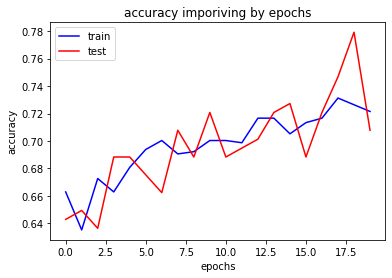

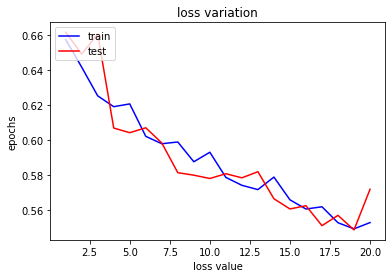

In [ ]:
from keras.layers import Dense
from keras.models import  Sequential
import numpy as np
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(7)

data=np.loadtxt('pima-indians-diabetes.csv',delimiter=',')

X=data[:,0:-1]
Y=data[:,-1]

model=Sequential()
model.add(Dense(10,input_dim=8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


# checkpoint best neural network model only
file_path='best-weights.hdf5'
checkpoint=ModelCheckpoint(filepath=file_path,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callback_list=[checkpoint]

learning=model.fit(X,Y,validation_split=0.2,epochs=20,batch_size=5,callbacks=callback_list,verbose=0)
print(learning.history.keys())
print(learning.history['accuracy'])

# summarize history for accuracy
plt.plot(learning.history['accuracy'],label='train',color='blue')
plt.plot(learning.history['val_accuracy'],label='test',color='red')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy imporiving by epochs')
plt.legend(loc='best')
plt.show()
x=[i for i in range(1,21)]


# summarize history for loss
sns.lineplot(x=x,y=learning.history['loss'],color='blue',label='train').set(title = 'loss variation',xlabel='loss value')
sns.lineplot(x=x,y=learning.history['val_loss'],color='red',label='test')
plt.ylabel('epochs')
plt.legend(loc='upper left')
plt.show()



**Load and use weights from the previous checkpoint**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

numpy.random.seed(7)

model=Sequential()
model.add(Dense(10,input_dim=8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid'))

# load weights
model.load_weights("best-weights.hdf5")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Created model and loaded weights from file
accuracy: 74.35%


**Time-based Learning rate schedule**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)
data=np.loadtxt('pima-indians-diabetes.csv',delimiter=',')
X=data[:,0:-1]
Y=data[:,-1]

model=Sequential()
model.add(Dense(10,input_dim=8,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid'))

'''Adapting the learning rate for your stochastic gradient descent optimization
procedure can increase performance and reduce training time!

LearningRate=LearningRate*(1/(1+deacy*epcoh))
'''

# Compile model
learning_rate=0.1
decay_rate=learning_rate/50
momentum=0.8

sgd=SGD(learning_rate=learning_rate,momentum=momentum,decay=decay_rate,nesterov=False)

model.compile(optimizer=sgd,metrics=['accuracy'],loss='binary_crossentropy')
model.fit(X,Y,epochs=150,batch_size=5,verbose=1)

score=model.evaluate(X,Y)
print("%s is %.3f%%" %(model.metrics_names[1],score[1]))

Epoch 1/150
768/768 [==============================] - 0s 343us/step - loss: 0.6536 - accuracy: 0.6471
Epoch 2/150
768/768 [==============================] - 0s 232us/step - loss: 0.6517 - accuracy: 0.6510
Epoch 3/150
768/768 [==============================] - 0s 234us/step - loss: 0.6518 - accuracy: 0.6510
Epoch 4/150
768/768 [==============================] - 0s 249us/step - loss: 0.6523 - accuracy: 0.6510
Epoch 5/150
768/768 [==============================] - 0s 242us/step - loss: 0.6490 - accuracy: 0.6510
Epoch 6/150
768/768 [==============================] - 0s 243us/step - loss: 0.6490 - accuracy: 0.6510
Epoch 7/150
768/768 [==============================] - 0s 234us/step - loss: 0.6492 - accuracy: 0.6510
Epoch 8/150
768/768 [==============================] - 0s 241us/step - loss: 0.6494 - accuracy: 0.6510
Epoch 9/150
768/768 [==============================] - 0s 250us/step - loss: 0.6494 - accuracy: 0.6510
Epoch 10/150
768/768 [==============================] - 0s 242us/step - l

SAME CODE but using KerasClassifier and compiing model inside function

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score #works


np.random.seed(7)
data=np.loadtxt('pima-indians-diabetes.csv',delimiter=',')
X=data[:,0:-1]
Y=data[:,-1]
def create_model():
 model=Sequential()
 model.add(Dense(10,input_dim=8,activation='relu',kernel_initializer='uniform'))
 model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
 model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
 model.add(Dense(10,activation='relu',kernel_initializer='uniform'))
 model.add(Dense(1,activation='sigmoid'))
 # Compile model
 learning_rate=0.1
 decay_rate=learning_rate/50
 momentum=0.8
 sgd=SGD(learning_rate=learning_rate,momentum=momentum,decay=decay_rate,nesterov=False)
 model.compile(optimizer=sgd,metrics=['accuracy'],loss='binary_crossentropy')
 return model
'''Adapting the learning rate for your stochastic gradient descent optimization
procedure can increase performance and reduce training time!

LearningRate=LearningRate*(1/(1+deacy*epcoh))
'''


kerasClass=KerasClassifier(build_fn=create_model,epochs=10,batch_size=10,verbose=0)

kerasClass.fit(X,Y,epochs=100,batch_size=5,verbose=1)     # the epochs and batch size given in this line will be concidered for the fiiting phase

prediction = kerasClass.predict(X)
score=accuracy_score(Y, prediction)
print(score)

Epoch 1/100
768/768 [==============================] - 0s 323us/step - loss: 0.6512 - accuracy: 0.6471
Epoch 2/100
768/768 [==============================] - 0s 226us/step - loss: 0.6511 - accuracy: 0.6510
Epoch 3/100
768/768 [==============================] - 0s 233us/step - loss: 0.6516 - accuracy: 0.6510
Epoch 4/100
768/768 [==============================] - 0s 239us/step - loss: 0.6522 - accuracy: 0.6510
Epoch 5/100
768/768 [==============================] - 0s 226us/step - loss: 0.6490 - accuracy: 0.6510
Epoch 6/100
768/768 [==============================] - 0s 264us/step - loss: 0.6490 - accuracy: 0.6510
Epoch 7/100
768/768 [==============================] - 0s 262us/step - loss: 0.6492 - accuracy: 0.6510
Epoch 8/100
768/768 [==============================] - 0s 225us/step - loss: 0.6494 - accuracy: 0.6510
Epoch 9/100
768/768 [==============================] - 0s 290us/step - loss: 0.6494 - accuracy: 0.6510
Epoch 10/100
768/768 [==============================] - 0s 230us/step - l